In [1]:
from predictor import *
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pickle

%matplotlib inline
%load_ext autoreload
%autoreload 2

In [2]:
train_models = True

In [3]:
variable_names = ["NGDP", "RGDP"]
forecast_horizons = [0, 1, 2, 3, 4]
alphas = [4, 10, 20, 50, 100]

if train_models:
    models = {
        "Average": AverageForecasts(variable_names, forecast_horizons).fit(),
        "Median": MedianForecasts(variable_names, forecast_horizons).fit(),
        "Geometric": GeomAverageForecasts(variable_names, forecast_horizons).fit(),
        "Harmonic": HarmAverageForecasts(variable_names, forecast_horizons).fit(),
        "AvgMedian": AverageMedianForecasts(variable_names, forecast_horizons).fit(),
        "Normal": NormalIndependent(variable_names, forecast_horizons).fit(),
        "OL": OnlineLearning(variable_names, forecast_horizons, alpha=0.8).fit()
    }

    for alpha in alphas:
        models[f"Bayesian_{alpha}"] = BayesianModels(variable_names, forecast_horizons, alpha=alpha).fit()

    pickle.dump(models, open("data/models.p", "wb"))
else:
    models = pickle.load(open("data/models.p", "rb"))

In [4]:
metric_names = ["mse", "mad"]
start = "1979Q1"
# start = "2000Q1"
end = "2021Q3"
# end = "2019Q3"

metrics = {k: {metric_names[i]: z for i, z in enumerate(v.calculate_metrics(start, end))} for k, v in models.items()}

In [5]:
def get_metrics_dfs(metrics, models):
    mse_ngdp = pd.concat([metrics[k]["mse"]["NGDP"] for k in models.keys()], axis=1, keys=models.keys())
    mse_rgdp = pd.concat([metrics[k]["mse"]["RGDP"] for k in models.keys()], axis=1, keys=models.keys())
    mad_ngdp = pd.concat([metrics[k]["mad"]["NGDP"] for k in models.keys()], axis=1, keys=models.keys())
    mad_rgdp = pd.concat([metrics[k]["mad"]["RGDP"] for k in models.keys()], axis=1, keys=models.keys())
    ngdp_metrics = pd.concat((mse_ngdp, mad_ngdp), axis=1, keys=["MSE", "MAD"]).round(2)
    rgdp_metrics = pd.concat((mse_rgdp, mad_rgdp), axis=1, keys=["MSE", "MAD"]).round(2)
    return ngdp_metrics, rgdp_metrics

In [6]:
ngdp_metrics, rgdp_metrics = get_metrics_dfs(metrics, models)
ngdp_metrics

MSE                                                                  \
      Average  Median Geometric Harmonic AvgMedian  Normal      OL Bayesian_4   
NGDP2   99.74   98.62     99.75    99.77     99.13   98.60   97.15      97.09   
NGDP3  262.85  260.91    263.16   263.47    261.82  260.21  266.61     260.53   
NGDP4  306.70  305.97    307.08   307.47    306.27  307.67  302.96     306.76   
NGDP5  362.33  360.34    362.81   363.31    361.26  359.80  352.51     360.33   
NGDP6  415.07  414.71    415.63   416.21    414.80  412.45  406.77     415.34   

                               ...       MAD                             \
      Bayesian_10 Bayesian_20  ... Geometric Harmonic AvgMedian  Normal   
NGDP2       95.89       94.90  ...     50.59    50.58     50.57   50.24   
NGDP3      261.19      261.89  ...    105.08   105.21    104.61  103.66   
NGDP4      306.76      306.76  ...    147.58   147.68    147.70  150.40   
NGDP5      360.13      360.01  ...    195.00   195.15    195.30  195.26   
NGDP6      415.28      415.16  ...    241.38   241.55    242.11  237.14   

                                                                           
           OL Bayesian_4 Bayesian_10 Bayesian_20 Bayesian_50 Bayesian_100  
NGDP2   49.34      49.98       49.82       49.71       49.59        49.54  
NGDP3  106.34     104.29      104.61      104.87      105.19       105.37  
NGDP4  145.90     149.90      149.98      150.01      150.02       150.01  
NGDP5  191.45     195.71      195.46      195.27      195.10       195.04  
NGDP6  238.08     241.34      241.04      240.68      240.23       239.99  

[5 rows x 24 columns]

In [7]:
rgdp_metrics

MSE                                                                  \
      Average  Median Geometric Harmonic AvgMedian  Normal      OL Bayesian_4   
RGDP2  295.38  295.77    295.40   295.41    295.57  295.69  295.87     295.72   
RGDP3  458.47  459.56    458.58   458.70    459.01  458.57  458.71     461.06   
RGDP4  554.82  555.39    554.96   555.10    555.09  553.26  556.77     553.94   
RGDP5  638.51  639.28    638.69   638.87    638.87  637.86  642.34     638.92   
RGDP6  706.56  706.74    706.77   706.98    706.63  708.63  710.67     709.41   

                               ...       MAD                             \
      Bayesian_10 Bayesian_20  ... Geometric Harmonic AvgMedian  Normal   
RGDP2      295.57      295.44  ...     96.12    96.09     96.04   96.85   
RGDP3      462.26      462.87  ...    193.24   193.29    193.82  193.51   
RGDP4      553.93      554.00  ...    274.21   274.28    274.86  274.42   
RGDP5      638.64      638.39  ...    360.49   360.60    360.84  361.18   
RGDP6      709.38      709.34  ...    439.16   439.26    439.03  442.87   

                                                                           
           OL Bayesian_4 Bayesian_10 Bayesian_20 Bayesian_50 Bayesian_100  
RGDP2   95.62      96.65       96.49       96.40       96.36        96.34  
RGDP3  194.04     195.11      195.55      195.72      195.80       195.81  
RGDP4  275.67     274.23      274.48      274.74      275.07       275.26  
RGDP5  363.22     361.46      361.43      361.41      361.41       361.41  
RGDP6  441.93     443.58      443.70      443.81      443.90       443.93  

[5 rows x 24 columns]

In [8]:
pd.concat((ngdp_metrics["MSE"].idxmin(axis=1), ngdp_metrics["MAD"].idxmin(axis=1)), axis=1, keys=["MSE", "MAD"])

,MSE,MAD
NGDP2,Bayesian_100,OL
NGDP3,Normal,Normal
NGDP4,OL,OL
NGDP5,OL,OL
NGDP6,OL,Normal


In [9]:
rgdp_metrics

MSE                                                                  \
      Average  Median Geometric Harmonic AvgMedian  Normal      OL Bayesian_4   
RGDP2  295.38  295.77    295.40   295.41    295.57  295.69  295.87     295.72   
RGDP3  458.47  459.56    458.58   458.70    459.01  458.57  458.71     461.06   
RGDP4  554.82  555.39    554.96   555.10    555.09  553.26  556.77     553.94   
RGDP5  638.51  639.28    638.69   638.87    638.87  637.86  642.34     638.92   
RGDP6  706.56  706.74    706.77   706.98    706.63  708.63  710.67     709.41   

                               ...       MAD                             \
      Bayesian_10 Bayesian_20  ... Geometric Harmonic AvgMedian  Normal   
RGDP2      295.57      295.44  ...     96.12    96.09     96.04   96.85   
RGDP3      462.26      462.87  ...    193.24   193.29    193.82  193.51   
RGDP4      553.93      554.00  ...    274.21   274.28    274.86  274.42   
RGDP5      638.64      638.39  ...    360.49   360.60    360.84  361.18   
RGDP6      709.38      709.34  ...    439.16   439.26    439.03  442.87   

                                                                           
           OL Bayesian_4 Bayesian_10 Bayesian_20 Bayesian_50 Bayesian_100  
RGDP2   95.62      96.65       96.49       96.40       96.36        96.34  
RGDP3  194.04     195.11      195.55      195.72      195.80       195.81  
RGDP4  275.67     274.23      274.48      274.74      275.07       275.26  
RGDP5  363.22     361.46      361.43      361.41      361.41       361.41  
RGDP6  441.93     443.58      443.70      443.81      443.90       443.93  

[5 rows x 24 columns]

In [10]:
pd.concat((rgdp_metrics["MSE"].idxmin(axis=1), rgdp_metrics["MAD"].idxmin(axis=1)), axis=1, keys=["MSE", "MAD"])

,MSE,MAD
RGDP2,Bayesian_100,OL
RGDP3,Average,Average
RGDP4,Normal,Average
RGDP5,Normal,Average
RGDP6,Average,Median


## Combining model predictions

In [11]:
data = {var: [models[m_name].predictions[var].dropna().reset_index().assign(ID=m_name) for m_name in models.keys()] for var in variable_names}
data = {k: pd.concat(data[k], ignore_index=True, axis=0).sort_values(by=["DATE"]).reset_index(drop=True) for k in data.keys()}

In [12]:
models["OL_models"] = OnlineLearning(variable_names, forecast_horizons, data=data, alpha=0.8).fit()
metrics["OL_models"] = {metric_names[i]: z for i, z in enumerate(models["OL_models"].calculate_metrics(start, end))}

In [13]:
ngdp_metrics, rgdp_metrics = get_metrics_dfs(metrics, models)

In [14]:
ngdp_metrics["MSE"]

,Average,Median,Geometric,Harmonic,AvgMedian,Normal,OL,Bayesian_4,Bayesian_10,Bayesian_20,Bayesian_50,Bayesian_100,OL_models
NGDP2,99.74,98.62,99.75,99.77,99.13,98.60,97.15,97.09,95.89,94.90,93.86,93.37,99.34
NGDP3,262.85,260.91,263.16,263.47,261.82,260.21,266.61,260.53,261.19,261.89,262.85,263.42,262.36
NGDP4,306.70,305.97,307.08,307.47,306.27,307.67,302.96,306.76,306.76,306.76,306.75,306.74,306.86
NGDP5,362.33,360.34,362.81,363.31,361.26,359.80,352.51,360.33,360.13,360.01,359.90,359.86,362.28
NGDP6,415.07,414.71,415.63,416.21,414.80,412.45,406.77,415.34,415.28,415.16,414.99,414.89,415.90


In [15]:
ngdp_metrics["MAD"]

,Average,Median,Geometric,Harmonic,AvgMedian,Normal,OL,Bayesian_4,Bayesian_10,Bayesian_20,Bayesian_50,Bayesian_100,OL_models
NGDP2,50.59,50.63,50.59,50.58,50.57,50.24,49.34,49.98,49.82,49.71,49.59,49.54,50.56
NGDP3,104.96,104.45,105.08,105.21,104.61,103.66,106.34,104.29,104.61,104.87,105.19,105.37,104.88
NGDP4,147.48,148.31,147.58,147.68,147.70,150.40,145.90,149.90,149.98,150.01,150.02,150.01,147.68
NGDP5,194.86,195.84,195.00,195.15,195.30,195.26,191.45,195.71,195.46,195.27,195.10,195.04,195.25
NGDP6,241.21,243.06,241.38,241.55,242.11,237.14,238.08,241.34,241.04,240.68,240.23,239.99,242.34


<AxesSubplot: >

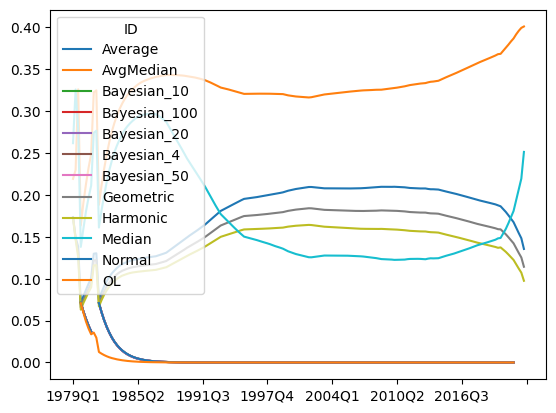

In [16]:
models["OL_models"].weights["NGDP"][0].plot()

In [17]:
pd.concat((ngdp_metrics["MSE"].idxmin(axis=1), ngdp_metrics["MAD"].idxmin(axis=1)), axis=1, keys=["MSE", "MAD"])

,MSE,MAD
NGDP2,Bayesian_100,OL
NGDP3,Normal,Normal
NGDP4,OL,OL
NGDP5,OL,OL
NGDP6,OL,Normal


In [18]:
pd.concat((rgdp_metrics["MSE"].idxmin(axis=1), rgdp_metrics["MAD"].idxmin(axis=1)), axis=1, keys=["MSE", "MAD"])

,MSE,MAD
RGDP2,Bayesian_100,OL
RGDP3,Average,Average
RGDP4,Normal,Average
RGDP5,Normal,Average
RGDP6,Average,Median


In [7]:
rgdp_metrics

MSE                                                                  \
      Average  Median Geometric Harmonic AvgMedian  Normal      OL Bayesian_4   
RGDP2  295.38  295.77    295.40   295.41    295.57  295.69  295.87     295.72   
RGDP3  458.47  459.56    458.58   458.70    459.01  458.57  458.71     461.06   
RGDP4  554.82  555.39    554.96   555.10    555.09  553.26  556.77     553.94   
RGDP5  638.51  639.28    638.69   638.87    638.87  637.86  642.34     638.92   
RGDP6  706.56  706.74    706.77   706.98    706.63  708.63  710.67     709.41   

                               ...       MAD                             \
      Bayesian_10 Bayesian_20  ... Geometric Harmonic AvgMedian  Normal   
RGDP2      295.57      295.44  ...     96.12    96.09     96.04   96.85   
RGDP3      462.26      462.87  ...    193.24   193.29    193.82  193.51   
RGDP4      553.93      554.00  ...    274.21   274.28    274.86  274.42   
RGDP5      638.64      638.39  ...    360.49   360.60    360.84  361.18   
RGDP6      709.38      709.34  ...    439.16   439.26    439.03  442.87   

                                                                           
           OL Bayesian_4 Bayesian_10 Bayesian_20 Bayesian_50 Bayesian_100  
RGDP2   95.62      96.65       96.49       96.40       96.36        96.34  
RGDP3  194.04     195.11      195.55      195.72      195.80       195.81  
RGDP4  275.67     274.23      274.48      274.74      275.07       275.26  
RGDP5  363.22     361.46      361.43      361.41      361.41       361.41  
RGDP6  441.93     443.58      443.70      443.81      443.90       443.93  

[5 rows x 24 columns]

In [8]:
pd.concat((ngdp_metrics["MSE"].idxmin(axis=1), ngdp_metrics["MAD"].idxmin(axis=1)), axis=1, keys=["MSE", "MAD"])

,MSE,MAD
NGDP2,Bayesian_100,OL
NGDP3,Normal,Normal
NGDP4,OL,OL
NGDP5,OL,OL
NGDP6,OL,Normal


In [9]:
rgdp_metrics

MSE                                                                  \
      Average  Median Geometric Harmonic AvgMedian  Normal      OL Bayesian_4   
RGDP2  295.38  295.77    295.40   295.41    295.57  295.69  295.87     295.72   
RGDP3  458.47  459.56    458.58   458.70    459.01  458.57  458.71     461.06   
RGDP4  554.82  555.39    554.96   555.10    555.09  553.26  556.77     553.94   
RGDP5  638.51  639.28    638.69   638.87    638.87  637.86  642.34     638.92   
RGDP6  706.56  706.74    706.77   706.98    706.63  708.63  710.67     709.41   

                               ...       MAD                             \
      Bayesian_10 Bayesian_20  ... Geometric Harmonic AvgMedian  Normal   
RGDP2      295.57      295.44  ...     96.12    96.09     96.04   96.85   
RGDP3      462.26      462.87  ...    193.24   193.29    193.82  193.51   
RGDP4      553.93      554.00  ...    274.21   274.28    274.86  274.42   
RGDP5      638.64      638.39  ...    360.49   360.60    360.84  361.18   
RGDP6      709.38      709.34  ...    439.16   439.26    439.03  442.87   

                                                                           
           OL Bayesian_4 Bayesian_10 Bayesian_20 Bayesian_50 Bayesian_100  
RGDP2   95.62      96.65       96.49       96.40       96.36        96.34  
RGDP3  194.04     195.11      195.55      195.72      195.80       195.81  
RGDP4  275.67     274.23      274.48      274.74      275.07       275.26  
RGDP5  363.22     361.46      361.43      361.41      361.41       361.41  
RGDP6  441.93     443.58      443.70      443.81      443.90       443.93  

[5 rows x 24 columns]

In [10]:
pd.concat((rgdp_metrics["MSE"].idxmin(axis=1), rgdp_metrics["MAD"].idxmin(axis=1)), axis=1, keys=["MSE", "MAD"])

,MSE,MAD
RGDP2,Bayesian_100,OL
RGDP3,Average,Average
RGDP4,Normal,Average
RGDP5,Normal,Average
RGDP6,Average,Median


## Combining model predictions

In [11]:
data = {var: [models[m_name].predictions[var].dropna().reset_index().assign(ID=m_name) for m_name in models.keys()] for var in variable_names}
data = {k: pd.concat(data[k], ignore_index=True, axis=0).sort_values(by=["DATE"]).reset_index(drop=True) for k in data.keys()}

In [12]:
models["OL_models"] = OnlineLearning(variable_names, forecast_horizons, data=data, alpha=0.8).fit()
metrics["OL_models"] = {metric_names[i]: z for i, z in enumerate(models["OL_models"].calculate_metrics(start, end))}

In [13]:
ngdp_metrics, rgdp_metrics = get_metrics_dfs(metrics, models)

In [14]:
ngdp_metrics["MSE"]

,Average,Median,Geometric,Harmonic,AvgMedian,Normal,OL,Bayesian_4,Bayesian_10,Bayesian_20,Bayesian_50,Bayesian_100,OL_models
NGDP2,99.74,98.62,99.75,99.77,99.13,98.60,97.15,97.09,95.89,94.90,93.86,93.37,99.34
NGDP3,262.85,260.91,263.16,263.47,261.82,260.21,266.61,260.53,261.19,261.89,262.85,263.42,262.36
NGDP4,306.70,305.97,307.08,307.47,306.27,307.67,302.96,306.76,306.76,306.76,306.75,306.74,306.86
NGDP5,362.33,360.34,362.81,363.31,361.26,359.80,352.51,360.33,360.13,360.01,359.90,359.86,362.28
NGDP6,415.07,414.71,415.63,416.21,414.80,412.45,406.77,415.34,415.28,415.16,414.99,414.89,415.90


In [18]:
ngdp_metrics["MAD"]

,Average,Median,Geometric,Harmonic,AvgMedian,Normal,OL,Bayesian_4,Bayesian_10,Bayesian_20,Bayesian_50,Bayesian_100,OL_models
NGDP2,50.59,50.63,50.59,50.58,50.57,50.24,49.34,49.98,49.82,49.71,49.59,49.54,50.56
NGDP3,104.96,104.45,105.08,105.21,104.61,103.66,106.34,104.29,104.61,104.87,105.19,105.37,104.88
NGDP4,147.48,148.31,147.58,147.68,147.70,150.40,145.90,149.90,149.98,150.01,150.02,150.01,147.68
NGDP5,194.86,195.84,195.00,195.15,195.30,195.26,191.45,195.71,195.46,195.27,195.10,195.04,195.25
NGDP6,241.21,243.06,241.38,241.55,242.11,237.14,238.08,241.34,241.04,240.68,240.23,239.99,242.34


<AxesSubplot: >

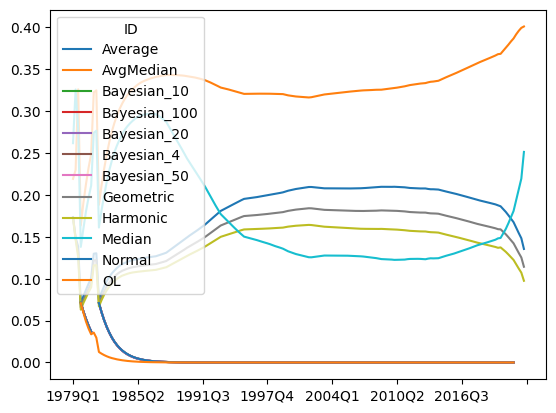

In [15]:
models["OL_models"].weights["NGDP"][0].plot()

In [16]:
pd.concat((ngdp_metrics["MSE"].idxmin(axis=1), ngdp_metrics["MAD"].idxmin(axis=1)), axis=1, keys=["MSE", "MAD"])

,MSE,MAD
NGDP2,Bayesian_100,OL
NGDP3,Normal,Normal
NGDP4,OL,OL
NGDP5,OL,OL
NGDP6,OL,Normal


In [17]:
pd.concat((rgdp_metrics["MSE"].idxmin(axis=1), rgdp_metrics["MAD"].idxmin(axis=1)), axis=1, keys=["MSE", "MAD"])

,MSE,MAD
RGDP2,Bayesian_100,OL
RGDP3,Average,Average
RGDP4,Normal,Average
RGDP5,Normal,Average
RGDP6,Average,Median
